In [170]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# 1-D heat equation Numerical Solver notebook
The aim of this notebook is to code a heat equation numerical solver for the 1-D heat equation, <br>
The 1-D heat equation is a partial differential equation describing the transfer of heat within a thin rod of unequal temperatures and is characterized by the below form,<br>
$\large\frac{\partial u}{\partial t} = k\frac{\partial^2 u}{\partial x^2}$<br>
This equation requires initial conditions, or the initial temperature profile of the rod, and boundary conditions or what is happening at the ends of the rods.<br>
depending on the conditions an analytical solution may be difficult or impossible to find and so numerical methods can be used to programatically solve the equation.<br>
tasks to complete<br>
* break down the heat equation into a numerical method for solving<br>
* solve 1-D Homogenous heat eqation with nueman boundary conditions<br>
* solve 1-D Homogenous heat equation with dirichlet boundary conditions<br>
* solve 1-D Homogenous heat equation with mixed boundary conditions<br>
* solve 1-D non-homogenous heat equation with each type of boundary conditions<br>
* create good looking plots for each form of the heat equation<br>

# Step 1 set up numerical method
### Finite difference method

in order to get a solution to the equation we can used finite difference methods to estimate the derivates<br>
Using the definition of a derivative and the foward difference method on the left hand side we can approximate the time derivative as follows<br>

$\large\frac{\partial u}{\partial t} \approx \frac{u(x,t+\Delta t)-u(x,t)}{\Delta t}$<br>
we apply a central difference method to the right hand side to get the approximation of the second spacial derivative<br>
$\large\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x+\Delta x,t)-2u(x,t)+u(x-\Delta x,t)}{(\Delta x)^2}$<br>
we can equate the two equations and solve for $u(x,t+\Delta t)$ giving the below equation<br>
$\large u(x,t+\Delta t) \approx u(x,t) + \alpha (u(x + \Delta x, t)-2u(x,t)+u(x-\Delta x,t))$ where $\alpha = k\frac {\Delta t}{(\Delta x)^2}$<br>
this can be applied with proper boundary and initial conditions

# Problem 1 (Homogenous Nueman Boundary Conditions)

lets look at a simple non dimensionalized version of the heat equation with nueman boundary conditions<br>
$\large\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2}$<br>
$IC: u(x,0) = f(x)$<br>
$BC: u(0,t) = u(1,t) = 0$<br>


In [190]:

#lets first define some variables for this problem
k = 1 #thermal diffusivity
l = 10 #length of rod
t = 1 #time interval
n = 100 #number of x points
m = 500 #number of time steps
dx = l/n #size of x step
dt = t/m #size of time steps

x = np.linspace(0,l,n) #list to hold x positions
t = np.linspace(0,t,m) #list to hold time positions

alpha = k*(dt/(dx*dx)) #alpha variable using above defenition, for stability alpha must be less than 0.5
 
print(alpha)


0.19999999999999996


In [200]:
#create initial condition, in this case u(x,0) = sin(pi*x)
u0 = np.zeros((n,m))
for i in range(0,len(x)):
    u0[i][0] = (np.cos(np.pi*x[i])+x[i])
    
#boundary conditions, in this case both ends are held at 0
x0 = 0
xL = 0

u[0][:] = x0
u[-1][:] = xL


In [201]:
u = np.zeros((n,m)) #array to hold solutions
for i in range(0,len(u0)): #initilize the time 0 points using our initial conditions array
    u[i][0] = u0[i][0]




In [202]:
for j in range(0,len(t)-1):
    for i in range(0,len(x)-1):
        u[i][j+1] = u[i][j]+alpha*(u[i+1][j]-(2*u[i][j])+u[i-1][j])
    u[0][j] = x0
    u[-1][j] = xL
    

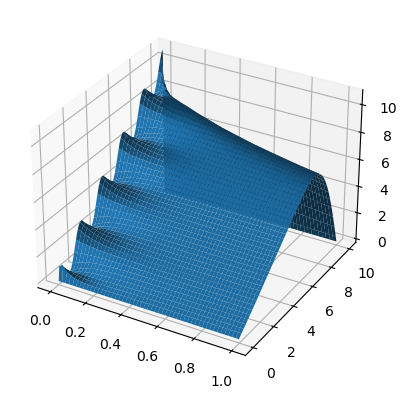

In [203]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
xp = np.outer(x,np.ones(len(t)))
yp = np.outer(t,np.ones(len(x))).T
ax.plot_surface(yp,xp,u)